In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import numpy.linalg as la
from sklearn import preprocessing
import seaborn as sns
%matplotlib inline

### 1. Загрузить файл hr.csv

In [3]:
data = pd.read_csv('HR.csv')

In [43]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### 2. Рассчитать основные статистики для переменных (среднее, медиана, мода, мин/макс, сред. отклонение)

In [4]:
data.describe() # таким методом посчитали среднее, мин., медиану (50%), макс. и сред. отклонение

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [9]:
data.info() # моду посчитаем для категориальных переменных (это sales и salary)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [10]:
data.select_dtypes(include=["object"]).mode()

,sales,salary
0,sales,low


### 3. Рассчитать и визуализировать корреляционную матрицу для переменных

In [11]:
corr_matrix=data.corr()
corr_matrix

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


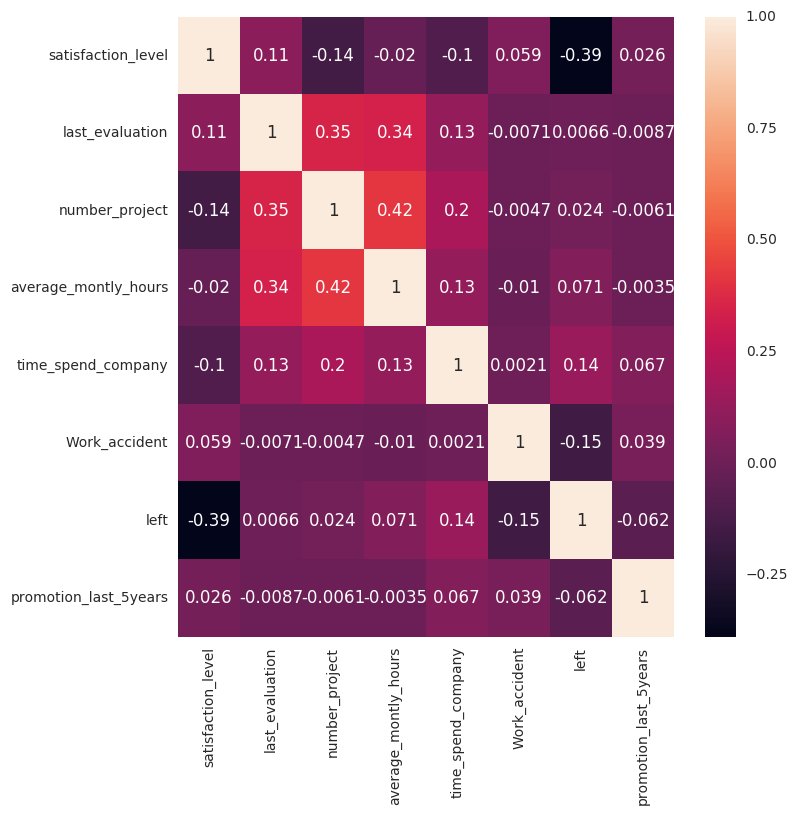

In [17]:
sns.set(rc=({'figure.figsize':(8,8)}))
sns.heatmap(corr_matrix, annot=True, xticklabels=corr_matrix.columns.values, yticklabels=corr_matrix.columns.values)

### 4. Визуализировать несколько взаимосвязей между переменными

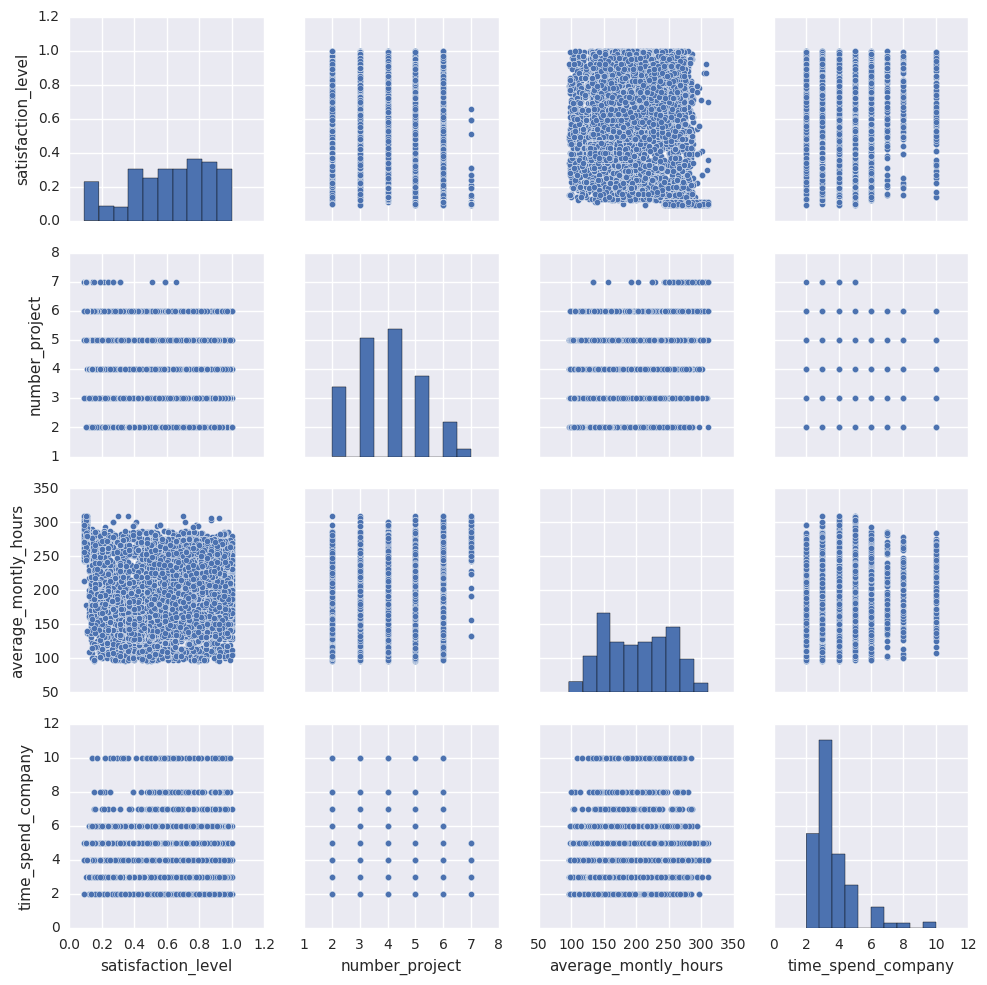

In [22]:
sns.pairplot(data, vars=['satisfaction_level','number_project','average_montly_hours','time_spend_company'], kind='scatter')

### 5. С использованием t-test статистики проверить взаимосвязи между несколькими переменными

In [65]:
with_accident=data[data['Work_accident']==1]['satisfaction_level']
without_accident=data[data['Work_accident']==0]['satisfaction_level']
sts.ttest_ind(with_accident,without_accident)

Ttest_indResult(statistic=7.2006106396951708, pvalue=6.2791799152194809e-13)

In [ ]:
Отвергаем гипотезу Н0, наличие инцедентов влияет удовлетворенность от работы

In [66]:
with_promotion=data[data['promotion_last_5years']==1]['satisfaction_level']
without_promotion=data[data['promotion_last_5years']==0]['satisfaction_level']
sts.ttest_ind(with_promotion,without_promotion)

Ttest_indResult(statistic=3.1366967917856816, pvalue=0.0017119316267238923)

In [ ]:
Отвергаем гипотезу Н0, факт повышения в течение 5 летвлияет удовлетворенность от работы

### 6. Рассчитать сколько работников работает в каждом департаменте

In [72]:
for i in set(data['sales']):
    print(i, len(data[data['sales']==i]))

management 630
sales 4140
marketing 858
accounting 767
product_mng 902
RandD 787
technical 2720
support 2229
IT 1227
hr 739


### 7. Показать распределение сотрудников по зарплатам

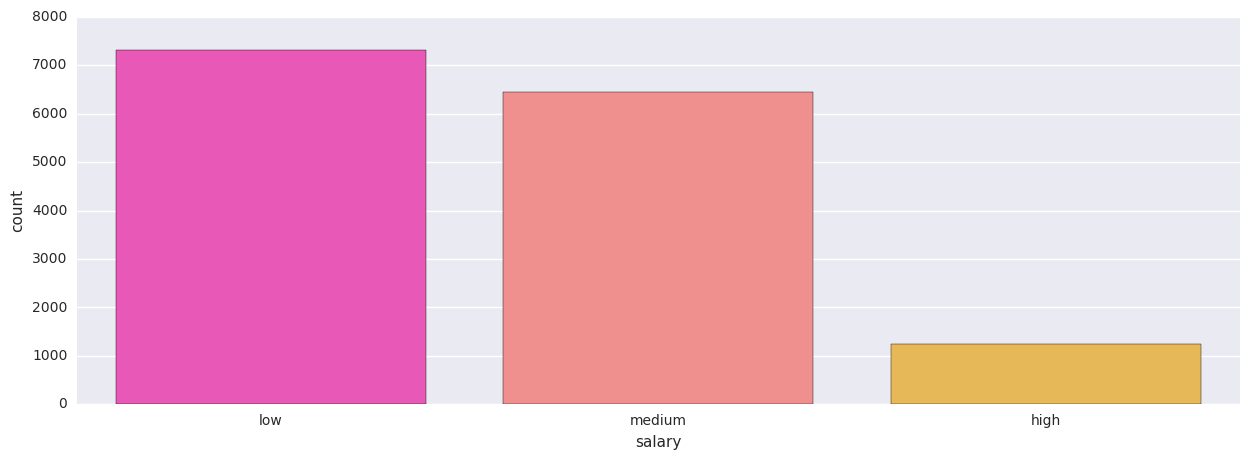

In [78]:
sns.set(rc=({'figure.figsize':(15,5)}))
sns.countplot(x='salary', data=data,palette='spring')

### 8. Показать распределение сотрудников по зарплатам совместно с департаментами

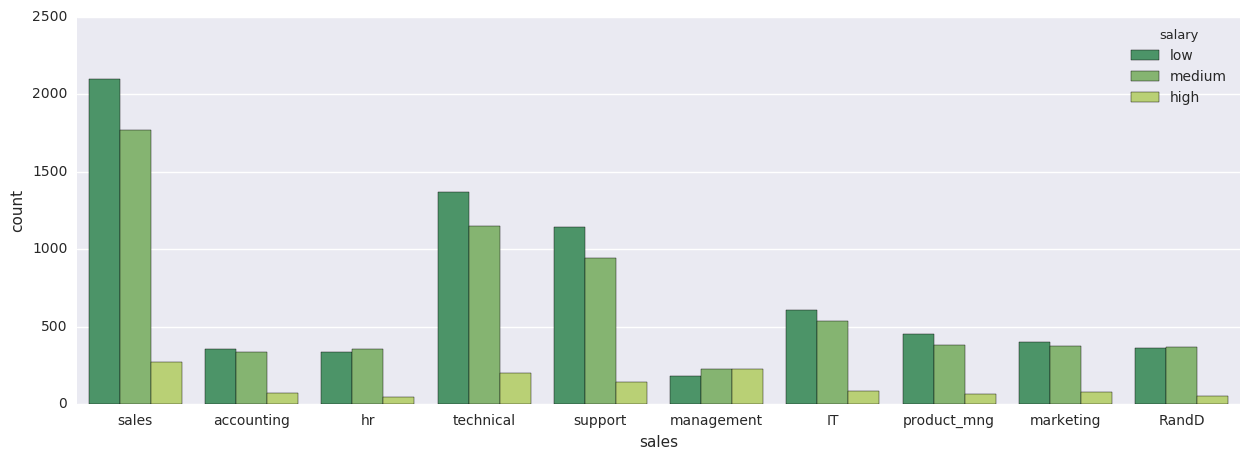

In [80]:
sns.set(rc=({'figure.figsize':(15,5)}))
sns.countplot(x='sales', hue='salary', data=data,palette='summer')

### 9. Сколько сотрудников покинули компанию

In [57]:
len(data[data['left']==1])

3571

### 10. Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию

In [61]:
left_=data[data['time_spend_company']==2]['left']
stay_=data[data['time_spend_company']==10]['left']
sts.ttest_ind(left_,stay_)

Ttest_indResult(statistic=1.8847588524626291, pvalue=0.059546242013040186)

In [ ]:
Отвергнуть Н0 не можем, срок службы в компании не влияет на то, ушел сотрудник или еще работает

In [62]:
left_=data[data['salary']=='low']['left']
stay_=data[data['salary']=='high']['left']
sts.ttest_ind(left_,stay_)

Ttest_indResult(statistic=17.320208157128619, pvalue=4.4069322497175903e-66)

In [ ]:
Отвергаем Н0, уровень зарплаты влияет на то, ушел сотрудник или еще работает